# Support Vector Machines

A support vector machine (SVM) is a ML procedure for learning linear predictors in high-dimensional feature spaces with regard to the sample complexity changes, using its duality property. Simply speaking, it draws a hyperplane that separates the space in which the data is located. That is, for some $w\neq 0$, a hyperplane of space $\mathcal X\subset \mathbb R^d$ is the subset

$$
S = \{x\in\mathbb R^d: \langle w, x \rangle + b = 0\}
$$

that separates $\mathcal X$ into two half-spaces

$$
\begin{gather*}
S^+ = \{ x\in\mathbb R^d: \langle w, x \rangle + b > 0 \}
\\
S^- = \{ x\in\mathbb R^d: \langle w, x \rangle + b < 0 \}.
\end{gather*}
$$

Here a halfspace is hypothesis class $\mathcal H$ designed for binary classification problem, $\mathcal X\subset \R^d$ and $\mathcal Y=\{-1, +1\}$ defined as

$$
\mathcal H=\{ x \mapsto \text{sign}(\langle w,x\rangle +b): w\in\mathbb R^d, b\in\mathbb R\}
$$

where $b$ is the bias. Each $h\in\mathcal H$ has a form $h_{w,b}(x)=\text{sign}(\langle w, x\rangle + b)$ and takes an input in $x\in \mathcal X$ and returns an output $y\in\mathcal Y$. Here we simply express the halfspace as $(w, b)$. 

We say a training set $\mathcal S=\{ (x_i, y_i) \}_{i=1}^n$ is _linearly separable_ if there exists a halfspace $(w, b)$ such that for all $i=1, \cdots, n$ we have

$$
y_i = \text{sign}(\langle w, x_i \rangle + b)
$$

or equivalently

$$
y_i \cdot (\langle w, x_i\rangle + b) > 0.
$$

For our loss function $L(x_i, y_i; w, b)= 1_{y_i \neq \text{sign} (\langle w, x_i\rangle + b) }$, we can estimate the loss using the empirical risk function 

$$
R_{\mathcal S}(w, b) = \frac{1}{n}\sum_{i=1}^n L(x_i, y_i ; w, b)
$$

and the halfspace $(w^*, b^*)$ that minimises this empirical risk can be expressed as

$$
(w^*, b^*) = \arg\min_{w, b} R_{\mathcal S}(w,b) = \arg\min_{w, b} \left( \frac{1}{n} \sum_{i=1}^n L(x_i, y_i; w, b) \right).
$$

There are many choices of $(w^*, b^*)$. Among them, we want to find the hyperplane that has the maximum margin, the minimal distance between a point in the training set and the hyperplane. If a hyperplane has a large margin, then it will still separate the training set even if we slightly perturb each instance.

### Hard Support Vector Machines

Hard support vector machine is the learning rule in which we return an ERM (empirical risk minimising) hyperplane that separates the training set with the largest possible margin. Assuming the training sample $\mathcal S=\{ (x_i, y_i) \}_{i=1}^n$ is linearly separable, the hard-SVM rule for the binary classification problem is to find $(\tilde w, \tilde b)=\arg\min_{w, b}\|w\|_2^2$ subject to $y_i\cdot (\langle w, x_i\rangle + b)\geq 1$ for all $i=1,\cdots, n$ and scale it to find $\hat w=\tilde w / \|\tilde w\|$ and $\hat b = \tilde b / \|\tilde w\|$. That is, hard-SVM searches for the hyperplane with minimum norm, among all those that separate the data and have distance not less than 1.

#### Proof

The distance between a point $x$ and the hyperplane defined by $(w, b)$, given $\| w\|_2^2$ = 1, is $|\langle w, x \rangle + b|$. The distance between the close point in the training set to the separating hyperplane is

$$
\min_i\left( |\langle w, x_i\rangle + b \right).
$$

By definition, the hard-SVM hypothesis is

$$
(w^*, b^*) = \arg\max_{w, b}\left( \min_i(|\langle w, x_i \rangle + b|) \right)
$$

subject to $\|w\|=1$ and the linear separability $y_i(\langle w, x_i\rangle + b) > 0$ for all $i=1,\cdots, n$.

if there is a solution for the above equation, then we have

$$
\begin{align*}
(w^*, b^*) 
&= \arg\max_{w, b}\left( \min_i(|\langle w, x_i \rangle + b|) \right)
\\
&= \arg\max_{w, b}\left( \min_i(y_i\langle w, x_i \rangle + b) \right).
\end{align*}
$$

We now show that $(w^*, b^*) = (\hat w, \hat b)$. Let $\gamma^*=\min_i\left( \langle w^*, x_i\rangle + b^* \right)$ be given. Because we have $y_i\cdot\left( \langle w^*, x_i\rangle + b \right) \geq \gamma^*$, which can be expressed as $y_i\cdot\left(\left\langle \frac{w^*}{\gamma^*}, x_i \right\rangle + \frac{b^*}{\gamma^*} \right) \geq 1$, the pair $\left( \frac{w^*}{\gamma^*}, \frac{b^*}{\gamma^*} \right)$ satisfies the condition $y_i\cdot (\langle w, x_i\rangle + b)\geq 1$. Also, because $(\tilde w, \tilde b)=\arg\min_{w, b}\|w\|$ subject to $y_i\cdot(\langle w, x_i\rangle + b)\geq 1$, given $\|w^*\|_2^2\|=1$, we have

$$
\|\tilde w\|\geq \left\| \frac{w^*}{\gamma^*} \right\|=\frac{1}{\gamma^*}.
$$

Thus, for all $i=1,\cdots, n$ it is

$$
\begin{align*}
y_i\cdot (\langle \hat w, x_i\rangle + \hat b) 
&= \frac{1}{\|\tilde w\|}y_i\cdot(\langle \tilde w, x_i\rangle + \tilde b)
\\
&\geq \frac{1}{\|\tilde w\|} \geq \frac{1}{\|w^*\|} \geq \gamma^*.
\end{align*}
$$

Hence $(\hat w, \hat b)$ is the optimal solution.

### Soft Support Vector Machines

Soft Support Vector Machine aims to relax the strong assumption of hard-SVM that the training set is linearly separable. This way, we can extend the scope of application. the soft-SVM rule finds

$$
(w^*, b^*, \xi^*) = \arg\min_{w, b, \xi}\left( \lambda \|w\|_2^2 + \frac{1}{n}\sum_{i=1}^n \xi_i \right)
$$

subject to $y_i\cdot (\langle w, x_i\rangle + b ) \geq 1-\xi_i$ for all $i=1,\cdots,n$ where $\xi_i\geq0$. Here, the non-negative quantities $\{ \xi_i \}_{i=1}^n$ controls how much the separability assumption $y_i\cdot(\langle w, x_i\rangle + b)\geq 1$ is violated and $\lambda$ controls the trade-off between the two terms.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.svm as svm
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


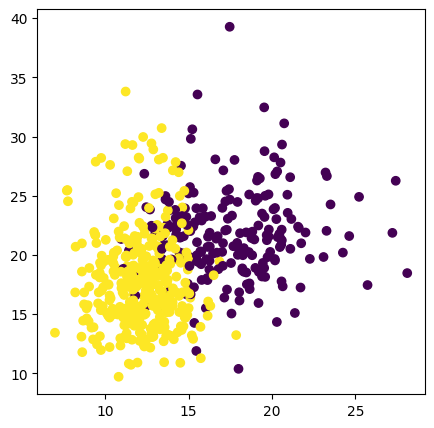

In [49]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

fig = plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [24]:
# import breast cancer dataset

data = datasets.load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

df.info()
df.describe()
df.target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

target
1    357
0    212
Name: count, dtype: int64

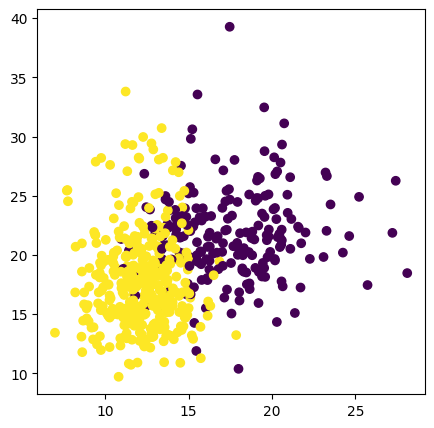

In [37]:
X = data.data
y = data.target

fig = plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
# linear kernel
model_linear = svm.SVC(kernel='linear')
scores_linear = cross_val_score(model_linear, X_train, y_train, cv=5)
print(f"Linear kernel: {scores_linear.mean()}")

# rbf kernel
model_rbf = svm.SVC(kernel='rbf')
scores_rbf = cross_val_score(model_rbf, X_train, y_train, cv=5)
print(f"RBF kernel: {scores_rbf.mean()}")

Linear kernel: 0.9670329670329672
RBF kernel: 0.9736263736263737


In [43]:
# SVM parameter tuning
model = svm.SVC()
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.9758241758241759
